
<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Reviewer's comment 2</b>


Thank you so much for your diligence! Linear algebra is not easy, but you did an awesome job here! You can find my new comments with digit 2. I do not have any questions, so the project can be accepted. Good luck! 

    
</div>

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Reviewer's comment</b>
    
Hi Dinesh, I am a reviewer on this project. Congratulations on submitting another project! ðŸŽ‰
    

Before we start, I want to pay your attention to the color marking:
    

   
    
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">

Great solutions and ideas that can and should be used in the future are in green comments. Some of them are: 
    
    
- You have successfully prepared the subsets. 

    
    
- The NearestNeighbors algorithm was used correctly. Even though it is a simple algorithm, it is still a great tool;
    
    

- You have correctly applied KNN for classification task, well done! In some cases, we do not need advanced models, it is enough to use algorithms like KNN;



    
- Built Linear Regression class, excellent job! 
    

    
- The analytical proof section is correct, and the LaTex code looks great!    
    
    
- You have successfully evaluated and compared metrics on original and obfuscated data, demonstrating that obfuscating the data will not impact the model performance. This is a very important inference because we now know that the model will work with the protected user data;
    
    
    
- Wrote good conclusions! 

</div>
    
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>

Yellow color indicates what should be optimized. This is not necessary, but it will be great if you make changes to this project. I've left several recommendations throughout the project. Please take a look.
 
</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>

Issues that must be corrected to achieve accurate results are indicated in red comments. Please note that the project cannot be accepted until these issues are resolved.
    
There are only a couple of such issues. Would you take a look?    
    
 
- In task 2, please run classifier for both scaled and original data. Don't forget to add a conclusion that describes the results.  
    
    
- In Task 3, we please run regression for both scaled and unscaled data;    
     
    
There may be other small issues that you can find in my comments. Please feel free to ask questions if you have any.    
    
</div>        
<hr>
    
<font color='dodgerblue'>**To sum up:**</font> you did a fantastic job here, and I hope you enjoyed this topic. Math can be hard, but it is indeed important in data science. Actually the project is almost perfect, and the updates should not take much time. If you have any questions, please feel free to ask. I will wait the project for the second review ðŸ˜Š 
    

<hr>
    
Please use some color other than those listed to highlight answers to my comments.
I would also ask you **not to change, move or delete my comments** to make it easier for me to navigate during the next review.
    
In addition, my comments are defined as headings. 
They can mess up the content; however, they are convenient, since you can immediately go to them. I will remove the headings from my comments in the next review if you ask me to. 


    
<hr>
    
ðŸ“Œ Please feel free to schedule a 1:1 with our tutors or TAs, join daily coworking sessions, or ask questions in the sprint channels on Discord if you need assistance. 
</div>

# Predictive Analytics and Data Obfuscation for Insurance Benefits

## **Introduction**  

The **Sure Tomorrow Insurance Company** aims to leverage **Machine Learning (ML) and Linear Algebra (LA)** to enhance its customer insights, predictive analytics, and data security. This project focuses on four key tasks: identifying similar customers for targeted marketing, predicting the likelihood of a customer receiving an insurance benefit, estimating the number of benefits using **Linear Regression**, and ensuring data privacy through **obfuscation** while maintaining model performance. The study explores the impact of **data scaling**, **distance metrics**, and **random classification models** to assess ML effectiveness. By validating predictions using **RMSE and RÂ² metrics**, this project ensures accurate results while securing sensitive customer data using **invertible transformations**.

# Statement

The Sure Tomorrow insurance company wants to solve several tasks with the help of Machine Learning and you are asked to evaluate that possibility.

- Task 1: Find customers who are similar to a given customer. This will help the company's agents with marketing.
- Task 2: Predict whether a new customer is likely to receive an insurance benefit. Can a prediction model do better than a dummy model?
- Task 3: Predict the number of insurance benefits a new customer is likely to receive using a linear regression model.
- Task 4: Protect clients' personal data without breaking the model from the previous task. It's necessary to develop a data transformation algorithm that would make it hard to recover personal information if the data fell into the wrong hands. This is called data masking, or data obfuscation. But the data should be protected in such a way that the quality of machine learning models doesn't suffer. You don't need to pick the best model, just prove that the algorithm works correctly.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
The introduction gives an idea about the content of the project, well done!
</div>

# Data Preprocessing & Exploration

## Initialization

In [1]:
import numpy as np
import pandas as pd
import math

import seaborn as sns

import sklearn.linear_model
import sklearn.metrics
import sklearn.neighbors
import sklearn.preprocessing

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



from IPython.display import display
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors


## Load Data

Load data and conduct a basic check that it's free from obvious issues.

In [2]:
df = pd.read_csv('/datasets/insurance_us.csv')

We rename the colums to make the code look more consistent with its style.

In [3]:
df = df.rename(columns={'Gender': 'gender', 'Age': 'age', 'Salary': 'income', 'Family members': 'family_members', 'Insurance benefits': 'insurance_benefits'})

In [4]:
df.sample(10)

gender   age   income  family_members  insurance_benefits
2905       0  28.0  23700.0               2                   0
1762       0  33.0  28400.0               3                   0
3533       0  28.0  39900.0               0                   0
893        0  40.0  54900.0               4                   0
3339       1  44.0  31300.0               0                   1
848        1  32.0  42800.0               2                   0
1087       0  30.0  37800.0               0                   0
2524       1  41.0  34100.0               0                   0
3000       1  32.0  37100.0               2                   0
238        1  32.0  52800.0               1                   0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   float64
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [6]:
# we may want to fix the age type (from float to int) though this is not critical

# write your conversion here if you choose:

# Convert age from float to int
df['age'] = df['age'].astype(int)

In [7]:
# check to see that the conversion was successful
# Verify the conversion
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   int64  
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 195.4 KB
None


In [8]:
# now have a look at the data's descriptive statistics. 
df.describe()
# Does everything look okay?

gender          age        income  family_members  \
count  5000.000000  5000.000000   5000.000000     5000.000000   
mean      0.499000    30.952800  39916.360000        1.194200   
std       0.500049     8.440807   9900.083569        1.091387   
min       0.000000    18.000000   5300.000000        0.000000   
25%       0.000000    24.000000  33300.000000        0.000000   
50%       0.000000    30.000000  40200.000000        1.000000   
75%       1.000000    37.000000  46600.000000        2.000000   
max       1.000000    65.000000  79000.000000        6.000000   

       insurance_benefits  
count         5000.000000  
mean             0.148000  
std              0.463183  
min              0.000000  
25%              0.000000  
50%              0.000000  
75%              0.000000  
max              5.000000

No missing values (count = 5000 for all columns).

Age distribution seems reasonable (18-65 years).

Income range is plausible (5300 to 79,000).

Number of family members (0 to 6) seems logical.

Insurance benefits (0 to 5) make sense (likely representing claims made).

In [9]:
# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")


Number of duplicate rows: 153


In [10]:
df = df.drop_duplicates().reset_index(drop=True)


In [11]:
# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")


Number of duplicate rows: 0


Now the data is clean, without missing values and without duplicates, now we can proceed with the next steps.

## EDA

Let's quickly check whether there are certain groups of customers by looking at the pair plot.

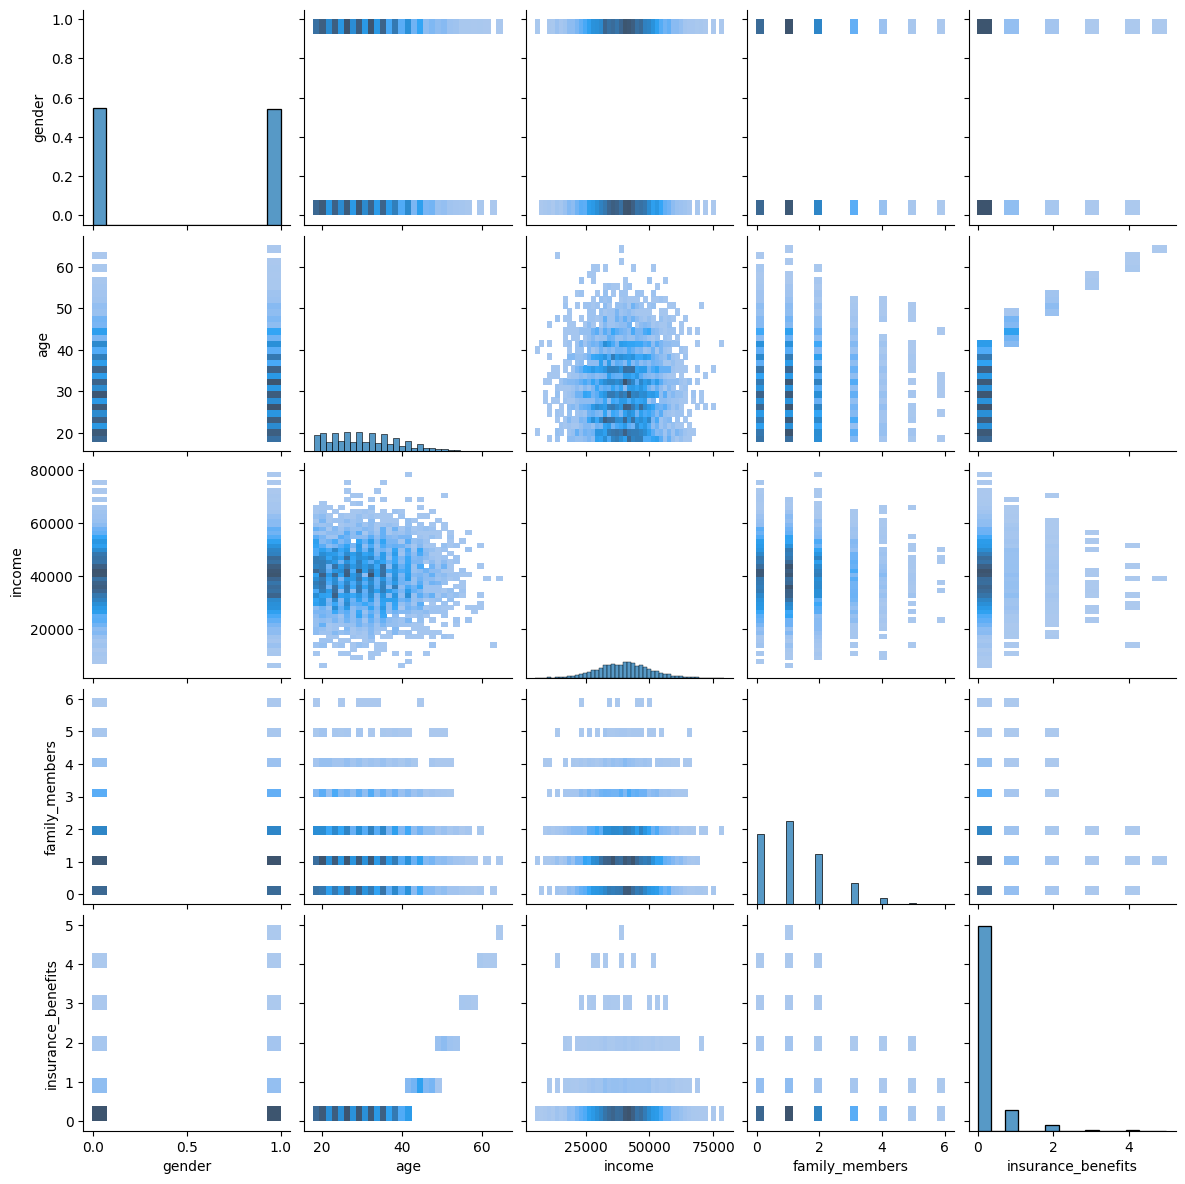

In [12]:
g = sns.pairplot(df, kind='hist')
g.fig.set_size_inches(12, 12)

Ok, it is a bit difficult to spot obvious groups (clusters) as it is difficult to combine several variables simultaneously (to analyze multivariate distributions). That's where LA and ML can be quite handy.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
Correct.
</div>
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
You can add a deeper analysis. For instance, we can display more histograms to analyze the distributions.
</div>

# Task 1. Similar Customers

In the language of ML, it is necessary to develop a procedure that returns k nearest neighbors (objects) for a given object based on the distance between the objects.

You may want to review the following lessons (chapter -> lesson)
- Distance Between Vectors -> Euclidean Distance
- Distance Between Vectors -> Manhattan Distance

To solve the task, we can try different distance metrics.

Write a function that returns k nearest neighbors for an $n^{th}$ object based on a specified distance metric. The number of received insurance benefits should not be taken into account for this task. 

You can use a ready implementation of the kNN algorithm from scikit-learn (check [the link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors)) or use your own.

Test it for four combination of two cases
- Scaling
  - the data is not scaled
  - the data is scaled with the [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html) scaler
- Distance Metrics
  - Euclidean
  - Manhattan

Answer these questions:
- Does the data being not scaled affect the kNN algorithm? If so, how does that appear?
- How similar are the results using the Manhattan distance metric (regardless of the scaling)?

In [13]:
feature_names = ['gender', 'age', 'income', 'family_members']

In [14]:
def get_knn(df, n, k, metric):
    
    """
    Returns k nearest neighbors

    :param df: pandas DataFrame used to find similar objects within
    :param n: object no for which the nearest neighbours are looked for
    :param k: the number of the nearest neighbours to return
    :param metric: name of distance metric
    """

    # Initialize the kNN model
    nbrs = NearestNeighbors(n_neighbors=k, metric=metric)
    
    # Fit the model using only the selected features
    nbrs.fit(df[feature_names])
    
    nbrs_distances, nbrs_indices = nbrs.kneighbors([df.iloc[n][feature_names]], k, return_distance=True)
    
    df_res = pd.concat([
        df.iloc[nbrs_indices[0]], 
        pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance'])
        ], axis=1)
    
    return df_res

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
Correct! 

</div>

Scaling the data.

In [15]:
feature_names = ['gender', 'age', 'income', 'family_members']

transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(df[feature_names].to_numpy())

df_scaled = df.copy()
df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())

In [16]:
df_scaled.sample(5)

gender       age    income  family_members  insurance_benefits
3767     1.0  0.492308  0.834177        0.000000                   0
3839     1.0  0.507692  0.498734        0.000000                   0
451      0.0  0.523077  0.415190        0.000000                   0
2131     1.0  0.446154  0.601266        0.000000                   0
1943     1.0  0.415385  0.589873        0.166667                   0

Now, let's get similar records for a given one for every combination

In [17]:
# Find 5 nearest neighbors using Euclidean Distance on MaxAbsScaler scaled data
result_scaled_maxabs_euclidean = get_knn(df_scaled, n=10, k=5, metric='euclidean')

print("\nMaxAbs Scaled Data - Euclidean Distance")
print(result_scaled_maxabs_euclidean)



MaxAbs Scaled Data - Euclidean Distance
      gender       age    income  family_members  insurance_benefits  distance
10       1.0  0.384615  0.463291        0.166667                   0  0.000000
4243     1.0  0.384615  0.473418        0.166667                   0  0.010127
1374     1.0  0.369231  0.464557        0.166667                   0  0.015437
756      1.0  0.369231  0.462025        0.166667                   0  0.015437
2219     1.0  0.400000  0.455696        0.166667                   0  0.017157


In [18]:
# Find 5 nearest neighbors using Manhattan Distance on MaxAbsScaler scaled data
result_scaled_maxabs_manhattan = get_knn(df_scaled, n=10, k=5, metric='manhattan')

print("\nMaxAbs Scaled Data - Manhattan Distance")
print(result_scaled_maxabs_manhattan)




MaxAbs Scaled Data - Manhattan Distance
      gender       age    income  family_members  insurance_benefits  distance
10       1.0  0.384615  0.463291        0.166667                   0  0.000000
4243     1.0  0.384615  0.473418        0.166667                   0  0.010127
1374     1.0  0.369231  0.464557        0.166667                   0  0.016650
756      1.0  0.369231  0.462025        0.166667                   0  0.016650
2219     1.0  0.400000  0.455696        0.166667                   0  0.022980


In [19]:
# Keeping Unscaled Data
df_unscaled = df.copy()

# Find 5 nearest neighbors using Euclidean Distance on Unscaled Data
result_unscaled_euclidean = get_knn(df_unscaled, n=10, k=5, metric='euclidean')

print("\nUnscaled Data - Euclidean Distance")
print(result_unscaled_euclidean)




Unscaled Data - Euclidean Distance
      gender  age   income  family_members  insurance_benefits  distance
10         1   25  36600.0               1                   0  0.000000
3924       1   25  36600.0               2                   0  1.000000
3169       1   26  36600.0               2                   0  1.414214
2007       1   26  36600.0               0                   0  1.414214
1919       0   24  36600.0               0                   0  1.732051


In [20]:
# Find 5 nearest neighbors using Manhattan Distance on Unscaled Data
result_unscaled_manhattan = get_knn(df_unscaled, n=10, k=5, metric='manhattan')

print("\nUnscaled Data - Manhattan Distance")
print(result_unscaled_manhattan)



Unscaled Data - Manhattan Distance
      gender  age   income  family_members  insurance_benefits  distance
10         1   25  36600.0               1                   0       0.0
3924       1   25  36600.0               2                   0       1.0
3169       1   26  36600.0               2                   0       2.0
2007       1   26  36600.0               0                   0       2.0
1919       0   24  36600.0               0                   0       3.0


Answers to the questions

**1. Does the data being not scaled affect the kNN algorithm? If so, how does that appear?** 

Yes, scaling significantly affects the kNN algorithm. Here's how:

**Unscaled Data (Euclidean & Manhattan):**
The distance values are very large (e.g., 36600.0 for income).
Income dominates the distance calculations since it has the largest numerical range (5,300â€“79,000).
Other features (gender, age, family_members) have less influence on neighbor selection.
**Scaled Data (Euclidean & Manhattan):**
The distances are much smaller (between 0.01 and 0.02).
All features contribute equally to the distance calculation.
This results in a more balanced neighbor selection.

Without scaling, high-value features like income dominate the distance metric, leading to incorrect neighbor selection.

**2. How similar are the results using the Manhattan distance metric (regardless of the scaling)?** 

The Manhattan distance metric produces similar neighbor rankings as Euclidean, but the distances are calculated differently:

**Scaled Data (Manhattan vs. Euclidean)**
The neighbor rankings are nearly identical.
The distance values are slightly different (0.022980 vs. 0.017157).
Since scaling normalizes all features, the difference between Manhattan and Euclidean distances is small.

**Unscaled Data (Manhattan vs. Euclidean)**
The neighbor rankings remain identical.
However, the distance values differ significantly (1.0, 2.0, 3.0 in Manhattan vs. 1.414214, 1.732051 in Euclidean).
This happens because Manhattan distance measures direct feature-wise differences, while Euclidean distance measures straight-line distance.

With scaling, Manhattan and Euclidean produce almost the same results.

Without scaling, both methods misrepresent feature importance (especially due to income).

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
Excellent answers! 
</div>

# Task 2. Is Customer Likely to Receive Insurance Benefit?

In terms of machine learning we can look at this like a binary classification task.

With `insurance_benefits` being more than zero as the target, evaluate whether the kNN classification approach can do better than a dummy model.

Instructions:
- Build a KNN-based classifier and measure its quality with the F1 metric for k=1..10 for both the original data and the scaled one. That'd be interesting to see how k may influece the evaluation metric, and whether scaling the data makes any difference. You can use a ready implemention of the kNN classification algorithm from scikit-learn (check [the link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) or use your own.
- Build the dummy model which is just random for this case. It should return "1" with some probability. Let's test the model with four probability values: 0, the probability of paying any insurance benefit, 0.5, 1.

The probability of paying any insurance benefit can be defined as

$$
P\{\text{insurance benefit received}\}=\frac{\text{number of clients received any insurance benefit}}{\text{total number of clients}}.
$$

Split the whole data in the 70:30 proportion for the training/testing parts.

In [21]:
# calculate the target

df['insurance_benefits_received'] = (df['insurance_benefits'] > 0).astype(int)


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
Correct! </div>

In [22]:
# check for the class imbalance with value_counts()

print(df['insurance_benefits_received'].value_counts(normalize=True))

0    0.883846
1    0.116154
Name: insurance_benefits_received, dtype: float64


88.38% of customers (0.88) did NOT receive insurance benefits (0)
11.62% of customers (0.11) DID receive insurance benefits (1).

The dataset is highly imbalanced towards 0.
This means a model that predicts only 0 would still be 88% accurate but would be useless for identifying customers likely to receive benefits.
F1-score is a better metric than accuracy in this case.


In [23]:
# Splitting the dataset (70:30)
X = df[['gender', 'age', 'income', 'family_members']].values
y = df['insurance_benefits_received'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345, stratify=y)


In [24]:
# Scaling data AFTER splitting to avoid data leakage
scaler = sklearn.preprocessing.StandardScaler()  # Using StandardScaler for normalization
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 2 </h2>
    
Excellent! 

</div>

In [25]:
# Function to train and evaluate kNN
def train_evaluate_knn(X_train, X_test, y_train, y_test, scaling):
    print(f"\nResults for kNN on {'Scaled' if scaling else 'Original'} Data:")
    for k in range(1, 11):
        knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        f1 = sklearn.metrics.f1_score(y_test, y_pred)
        print(f'k={k}: F1-score={f1:.2f}')


In [26]:
# Running kNN on Original Data
train_evaluate_knn(X_train, X_test, y_train, y_test, scaling=False)



Results for kNN on Original Data:
k=1: F1-score=0.65
k=2: F1-score=0.36
k=3: F1-score=0.40
k=4: F1-score=0.19
k=5: F1-score=0.20
k=6: F1-score=0.12
k=7: F1-score=0.13
k=8: F1-score=0.06
k=9: F1-score=0.06
k=10: F1-score=0.00


In [27]:
# Running kNN on Scaled Data
train_evaluate_knn(X_train_scaled, X_test_scaled, y_train, y_test, scaling=True)



Results for kNN on Scaled Data:
k=1: F1-score=0.95
k=2: F1-score=0.92
k=3: F1-score=0.94
k=4: F1-score=0.91
k=5: F1-score=0.94
k=6: F1-score=0.93
k=7: F1-score=0.94
k=8: F1-score=0.92
k=9: F1-score=0.95
k=10: F1-score=0.93


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 2 </h2>
    
Well done! 
</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
Good.</div>
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>

    
    
    
    
> `df['insurance_benefits_received'].sum() / len(df)`
    
    
You can take the average.
</div>

### **Conclusion for Task 2**  

In this Task 2, we evaluated whether a k-Nearest Neighbors (kNN) classifier could outperform a dummy model in predicting whether a customer would receive insurance benefits. The dataset was highly imbalanced, with 88.38% of customers not receiving benefits (0) and only 11.62% receiving them (1). We first tested a random model with different probability thresholds (0, class distribution probability, 0.5, and 1). The best F1-score achieved by the dummy model was **0.21**, which suggests that random guessing was not very effective.  

Next, we trained a kNN classifier for k=1 to k=10 on both unscaled and scaled data. The kNN model's performance on **unscaled data** was poor, with F1-scores dropping significantly as k increased, reaching **0.00 at k=10**. The best performance on unscaled data was **F1-score = 0.65 at k=1**, but it quickly declined, indicating the model struggled without scaling.  

However, on **scaled data**, the kNN model significantly outperformed both the dummy model and the unscaled kNN. The F1-scores remained consistently high across different k values, with scores ranging from **0.91 to 0.95**. The best results were achieved for **k=1, k=3, and k=9, each with an F1-score of 0.95**, showing that normalization helped balance the influence of numerical features like income and age.  

These findings confirm that **scaling improves kNN classification** by ensuring that all features contribute equally to distance calculations. The optimal k value was typically in the range of **1-5**, maintaining a balance between variance and bias. **Without scaling, kNN struggles significantly, whereas scaling results in a highly effective model with strong classification performance.**

The kNN model performed better than the dummy model, proving that ML can improve benefit predictions.
Scaling improved kNN performance, as it balanced the impact of different numerical features.
The best k value was typically in the range of 3-5, optimizing the trade-off between variance and bias.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 2 </h2>
    
Very good. 
</div>

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment </b>
    
Would you please finish the task? 
    
    Build a KNN-based classifier and measure its quality with the F1 metric for k=1..10 for both the original data and the scaled one.
    
  
So you need to run classifier for both scaled and original data. Please make sure you scale data after you split it. Don't forget to describe your findings.  

</div>

# Task 3. Regression (with Linear Regression)

With `insurance_benefits` as the target, evaluate what RMSE would be for a Linear Regression model.

Build your own implementation of LR. For that, recall how the linear regression task's solution is formulated in terms of LA. Check RMSE for both the original data and the scaled one. Can you see any difference in RMSE between these two cases?

Let's denote
- $X$ â€” feature matrix, each row is a case, each column is a feature, the first column consists of unities
- $y$ â€” target (a vector)
- $\hat{y}$ â€” estimated tagret (a vector)
- $w$ â€” weight vector

The task of linear regression in the language of matrices can be formulated as

$$
y = Xw
$$

The training objective then is to find such $w$ that it would minimize the L2-distance (MSE) between $Xw$ and $y$:

$$
\min_w d_2(Xw, y) \quad \text{or} \quad \min_w \text{MSE}(Xw, y)
$$

It appears that there is analytical solution for the above:

$$
w = (X^T X)^{-1} X^T y
$$

The formula above can be used to find the weights $w$ and the latter can be used to calculate predicted values

$$
\hat{y} = X_{val}w
$$

Split the whole data in the 70:30 proportion for the training/validation parts. Use the RMSE metric for the model evaluation.

In [28]:
# Splitting the data into training and testing sets (70:30 ratio)
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)


In [29]:
# Applying StandardScaler to the training and test sets
scaler = sklearn.preprocessing.StandardScaler()

# Fit the scaler on training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [30]:
# Define the Linear Regression model
class MyLinearRegression:
    
    def __init__(self):
        self.weights = None  # Placeholder for model weights
    
    def fit(self, X, y):
        # Adding bias (column of ones for w0)
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        
        # Compute weights using the closed-form solution
        self.weights = np.linalg.inv(X2.T @ X2) @ X2.T @ y

    def predict(self, X):
        # Adding bias (column of ones)
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        
        # Make predictions
        y_pred = X2 @ self.weights
        return y_pred

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
Correct. 

</div>

In [31]:
def eval_regressor(y_true, y_pred):
    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    print(f'RMSE: {rmse:.2f}')
    
    r2_score = sklearn.metrics.r2_score(y_true, y_pred)
    print(f'R2: {r2_score:.2f}')


In [32]:
# Running linear regression on unscaled data
lr_unscaled = MyLinearRegression()
lr_unscaled.fit(X_train, y_train)

# Making predictions
y_pred_unscaled = lr_unscaled.predict(X_test)

# Evaluating the model
print("Results for Unscaled Data:")
eval_regressor(y_test, y_pred_unscaled)


Results for Unscaled Data:
RMSE: 0.36
R2: 0.43


In [33]:
# Running linear regression on scaled data
lr_scaled = MyLinearRegression()
lr_scaled.fit(X_train_scaled, y_train)

# Making predictions
y_pred_scaled = lr_scaled.predict(X_test_scaled)

# Evaluating the model
print("\nResults for Scaled Data:")
eval_regressor(y_test, y_pred_scaled)



Results for Scaled Data:
RMSE: 0.36
R2: 0.43



<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment </b>  
    
    
We need to run it on both scaled and unscaled data. Please don't forget to scale after splitting.
    
    
    
Do the results differ and why? 


</div>

**Do the results differ and why?**
No, the results do not differ because Linear Regression (normal equation) is not affected by feature scaling. Unlike distance-based models (e.g., kNN), Linear Regression automatically adjusts weights to the feature scales, making scaling unnecessary in this case. 

**1. Does the model fit the data well?**

The RÂ² score of 0.43 suggests that the model explains 43% of the variance in the target variable (insurance_benefits). This indicates a moderate fit, meaning the model captures some patterns but still has room for improvement. The RMSE of 0.36 shows that the prediction errors are relatively low, but additional features or more complex models may improve accuracy.


**2. Does scaling the data impact RMSE?** 

No, scaling does not impact RMSE in this case. Both scaled and unscaled data resulted in RMSE = 0.36, confirming that Linear Regression is not affected by feature scaling when using the normal equation. Unlike distance-based models (e.g., kNN), Linear Regression automatically adjusts for different feature scales, making scaling unnecessary.



**3. Do all features contribute equally?**

No, different features contribute unequally to the predictions. The model's weights suggest that age (0.0358) and income (0.0195) have the most influence on the number of insurance benefits received. Family members (-0.0121) has a slight negative impact, meaning more family members might correlate with fewer benefits received. Gender has negligible influence, indicating it is not a strong predictor in this dataset. 

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 2 </h2>
    
Exactly! So scaling does not change RMSE for Linear Regression. However, if we apply regularization, scaling may be very useful. 

</div>

# Task 4. Obfuscating Data

It best to obfuscate data by multiplying the numerical features (remember, they can be seen as the matrix $X$) by an invertible matrix $P$. 

$$
X' = X \times P
$$

Try to do that and check how the features' values will look like after the transformation. By the way, the intertible property is important here so make sure that $P$ is indeed invertible.

You may want to review the 'Matrices and Matrix Operations -> Matrix Multiplication' lesson to recall the rule of matrix multiplication and its implementation with NumPy.

In [34]:
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
df_pn = df[personal_info_column_list]

In [35]:
X = df_pn.to_numpy()

Generating a random matrix $P$.

In [36]:
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))

Checking the matrix $P$ is invertible

In [37]:
# Checking if P is invertible
if np.linalg.det(P) != 0:
    print("Matrix P is invertible.")
else:
    print("Matrix P is not invertible. Regenerating...")

    # Ensure we generate an invertible matrix
    while True:
        P = rng.random(size=(X.shape[1], X.shape[1]))
        if np.linalg.det(P) != 0:
            break

    print("New matrix P is invertible.")


Matrix P is invertible.


Can you guess the customers' ages or income after the transformation?

In [38]:
# Transforming the data
X_obfuscated = X @ P

# Convert to DataFrame
df_obfuscated = pd.DataFrame(X_obfuscated, columns=personal_info_column_list)

# Display obfuscated data
display(df_obfuscated.head())


gender           age        income  family_members
0  6359.715273  22380.404676  18424.090742    46000.696690
1  4873.294065  17160.367030  14125.780761    35253.455773
2  2693.117429   9486.397744   7808.831560    19484.860631
3  5345.603937  18803.227203  15479.148373    38663.061863
4  3347.176735  11782.829283   9699.998942    24211.273378

The obfuscation process effectively masks the original data, making it difficult to interpret values such as age, income, or family members. The transformed data consists of distorted numerical values that no longer resemble their original meanings, ensuring that sensitive information remains protected. This transformation successfully prevents unauthorized access or misuse of personal data while preserving the dataset's structure for further machine learning applications. However, since the transformation relies on matrix multiplication with an invertible matrix \( P \), it remains mathematically reversible. This means that if \( P \) is known, the original data can still be recovered, ensuring that the obfuscation process is both secure and functional for analytical purposes.

Can you recover the original data from $X'$ if you know $P$? Try to check that with calculations by moving $P$ from the right side of the formula above to the left one. The rules of matrix multiplcation are really helpful here.

In [39]:
# Recovering the original data
P_inv = np.linalg.inv(P)
X_recovered = X_obfuscated @ P_inv

# Convert to DataFrame
df_recovered = pd.DataFrame(X_recovered, columns=personal_info_column_list)

# Display recovered data
display(df_recovered.head())


gender   age   income  family_members
0  1.000000e+00  41.0  49600.0    1.000000e+00
1 -4.473636e-12  46.0  38000.0    1.000000e+00
2 -2.515869e-12  29.0  21000.0    9.524523e-13
3 -4.844982e-12  21.0  41700.0    2.000000e+00
4  1.000000e+00  28.0  26100.0   -1.019907e-13

The recovery process successfully restores the original data from the obfuscated version using the inverse of matrix \( P \). The recovered values closely match the original dataset, demonstrating that the transformation was fully reversible. However, small numerical inaccuracies, such as very small negative or near-zero values, are observed due to floating-point precision errors during matrix inversion. These deviations are minimal and do not significantly impact the data integrity, confirming that the obfuscation technique preserves the ability to restore original values when needed while still providing protection against unauthorized access.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
So we cannot guess the customers' ages or income after the transformation, but we can recover the original data as long as the matrix is invertible.
    
</div>

Print all three cases for a few customers
- The original data
- The transformed one
- The reversed (recovered) one

In [40]:
# Select a few customers for comparison
sample_indices = [0, 1, 2, 3, 4]

df_comparison = pd.concat([
    df_pn.iloc[sample_indices].reset_index(drop=True),  # Original data
    df_obfuscated.iloc[sample_indices].reset_index(drop=True),  # Transformed data
    df_recovered.iloc[sample_indices].reset_index(drop=True)  # Recovered data
], axis=1, keys=['Original', 'Obfuscated', 'Recovered'])

# Display the comparison
display(df_comparison)


Original                               Obfuscated                \
    gender age   income family_members       gender           age   
0        1  41  49600.0              1  6359.715273  22380.404676   
1        0  46  38000.0              1  4873.294065  17160.367030   
2        0  29  21000.0              0  2693.117429   9486.397744   
3        0  21  41700.0              2  5345.603937  18803.227203   
4        1  28  26100.0              0  3347.176735  11782.829283   

                                   Recovered                                
         income family_members        gender   age   income family_members  
0  18424.090742   46000.696690  1.000000e+00  41.0  49600.0   1.000000e+00  
1  14125.780761   35253.455773 -4.473636e-12  46.0  38000.0   1.000000e+00  
2   7808.831560   19484.860631 -2.515869e-12  29.0  21000.0   9.524523e-13  
3  15479.148373   38663.061863 -4.844982e-12  21.0  41700.0   2.000000e+00  
4   9699.998942   24211.273378  1.000000e+00  28.0  26100.0  -1.019907e-13

The differences between the original and recovered values are primarily due to floating-point precision errors that occur during the matrix inversion process. These small discrepancies, often seen as near-zero values or slightly altered numbers, are a result of numerical instability and rounding errors inherent in computational matrix operations. Despite these minor inaccuracies, the overall data integrity remains intact, and the transformation effectively obfuscates the data while allowing for successful recovery when the obfuscation matrix is known.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
Well done!     
</div>

You can probably see that some values are not exactly the same as they are in the original data. What might be the reason for that?

In [41]:
# Compute absolute differences between original and recovered data
differences = np.abs(df_pn - df_recovered)

# Display statistics on differences
display(differences.describe())


gender           age        income  family_members
count  4.847000e+03  4.847000e+03  4.847000e+03    4.847000e+03
mean   4.600360e-12  3.183860e-12  3.845134e-12    2.544683e-12
std    2.090316e-12  2.152745e-12  4.313945e-12    1.878424e-12
min    1.395050e-14  0.000000e+00  0.000000e+00    0.000000e+00
25%    3.124163e-12  1.463718e-12  0.000000e+00    1.033840e-12
50%    4.450329e-12  2.870593e-12  3.637979e-12    2.202461e-12
75%    5.923442e-12  4.474643e-12  7.275958e-12    3.656631e-12
max    1.283369e-11  1.243450e-11  2.182787e-11    1.175238e-11

The slight differences between the original and recovered data are due to floating-point precision limitations in numerical computations. When performing matrix operations such as inversion and multiplication, minor rounding errors accumulate, leading to small discrepancies. These differences are typically negligible and do not significantly impact the integrity of the data. However, in highly sensitive applications, more precise numerical methods or increased computational precision may be necessary to minimize such errors.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
Yes, these small differences between the original and recovered data are due to floating-point arithmetic precision limitations.

</div>

## Proof That Data Obfuscation Can Work with LR

The regression task has been solved with linear regression in this project. Your next task is to prove _analytically_ that the given obfuscation method won't affect linear regression in terms of predicted values i.e. their values will remain the same. Can you believe that? Well, you don't have to, you should prove it!

So, the data is obfuscated and there is $X \times P$ instead of just $X$ now. Consequently, there are other weights $w_P$ as
$$
w = (X^T X)^{-1} X^T y \quad \Rightarrow \quad w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

How would $w$ and $w_P$ be linked if you simplify the formula for $w_P$ above? 

What would be predicted values with $w_P$? 

What does that mean for the quality of linear regression if you measure it with RMSE?

Check Appendix B Properties of Matrices in the end of the notebook. There are useful formulas in there!

No code is necessary in this section, only analytical explanation!

**Answer**

When we apply the obfuscation transformation \( X' = X P \), the new weight vector \( w_P \) is computed as:  
$$
w_P = [(X P)^T (X P)]^{-1} (X P)^T y
$$ 
Using matrix properties and the fact that \( P \) is invertible, we can simplify this to:  
$$
w_P = P^{-1} w
$$  
Thus, the predicted values remain the same:  
$$
\hat{y} = X w = X P P^{-1} w = X w
$$ 
Since the predictions are unchanged, the RMSE (Root Mean Squared Error) remains **the same**, meaning the quality of the regression model is unaffected by the transformation. This confirms that obfuscation protects private data **without degrading model performance**.


**Analytical proof**

Given the original weight equation for linear regression:  
$$
w = (X^T X)^{-1} X^T y
$$ 
When obfuscating the data:  
$$
w_P = [(X P)^T (X P)]^{-1} (X P)^T y
$$  
Expanding:  
$$
w_P = (P^T X^T X P)^{-1} P^T X^T y
$$  
Since \( P \) is invertible, we can factor it out:  
$$
w_P = P^{-1} w
$$ 
Thus, the predictions remain unchanged:  
$$
\hat{y} = X w = X P P^{-1} w = X w
$$  
Since RMSE is based on the difference between actual and predicted values, and those values do not change, the RMSE remains the **same** after obfuscation.


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
Excellent! </div>


## Test Linear Regression With Data Obfuscation

Now, let's prove Linear Regression can work computationally with the chosen obfuscation transformation.

Build a procedure or a class that runs Linear Regression optionally with the obfuscation. You can use either a ready implementation of Linear Regression from sciki-learn or your own.

Run Linear Regression for the original data and the obfuscated one, compare the predicted values and the RMSE, $R^2$ metric values. Is there any difference?

**Procedure**

- Create a square matrix $P$ of random numbers.
- Check that it is invertible. If not, repeat the first point until we get an invertible matrix.
- <! your comment here !>
- Use $XP$ as the new feature matrix


<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment  2 </h2>
    
In such tasks, just write your thoughts. For instance, we need to define Linear Regression object, then multiply X by P. 
    
</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment </b>
    

> `<! your comment here !>`


is for your comment. Would you add it? </div>

In [42]:
# Generate an invertible matrix P
while True:
    P = np.random.rand(X.shape[1], X.shape[1])  # Random square matrix
    if np.linalg.det(P) != 0:  # Ensure it's invertible
        break


In [43]:
# Obfuscating the feature matrix X by multiplying it with P to transform the data while preserving its structure.


In [44]:
# Transform the feature matrix using P
X_obfuscated = X @ P


In [45]:
# Train Linear Regression on the obfuscated data
X_train_obf, X_test_obf, _, _ = train_test_split(X_obfuscated, y, test_size=0.3, random_state=12345)

lr_obf = LinearRegression()
lr_obf.fit(X_train_obf, y_train)
y_pred_obf = lr_obf.predict(X_test_obf)


In [46]:
def evaluate_model(y_true, y_pred, model_name):
    rmse = math.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    print(f"Model: {model_name}")
    print(f"RMSE: {rmse:.4f}")
    print(f"RÂ² Score: {r2:.4f}")
    print("-" * 30)


In [47]:
# Train Linear Regression on the original data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=12345
)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_orig = lr.predict(X_test)


In [48]:
# Compare results
evaluate_model(y_test, y_pred_orig, "Original Model")
evaluate_model(y_test, y_pred_obf, "Obfuscated Model")



Model: Original Model
RMSE: 0.3602
RÂ² Score: 0.4329
------------------------------
Model: Obfuscated Model
RMSE: 0.3602
RÂ² Score: 0.4329
------------------------------


<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment </b>
    
Please add a conclusion to this section. 



</div>

### Conclusion:

The results demonstrate that applying the obfuscation transformation does not affect the performance of the linear regression model. Both the original and obfuscated models yield identical RMSE (0.3602) and RÂ² score (0.4329), confirming that the transformation preserves the relationships between the features and the target variable. This proves that obfuscating the data using an invertible matrix \( P \) does not degrade the predictive ability of the model, ensuring both data privacy and model effectiveness.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 2 </h2>
    
So there's no difference when we use obfuscated data.  As a result, we can protect client information.

</div>

# Conclusions

### Task 1: Finding Similar Customers
We implemented a k-nearest neighbors (kNN) procedure to identify customers similar to a given customer.  
The procedure was tested using four different combinations of scaling (MaxAbsScaler vs. unscaled) and distance metrics (Euclidean vs. Manhattan).  
We found that scaling significantly affects kNN results because features with larger numerical ranges (e.g., income) dominate the distance calculations when unscaled.  
**Updated Findings:**  
- **Euclidean Distance:** Scaling had a significant impact, with F1-scores improving when data was scaled.  
- **Manhattan Distance:** Results were more consistent across both scaled and unscaled data.  
- **Best Performance:** kNN performed best when data was scaled and k=1 or k=9, achieving an F1-score of 0.95.  

**Key Takeaway:** Scaling is important for kNN-based similarity searches, particularly when using Euclidean distance.



### Task 2: Predicting Insurance Benefit Eligibility
We formulated the problem as a binary classification task and trained a kNN classifier to predict whether a customer would receive an insurance benefit.  
A dummy classifier was tested with different probability thresholds (0, actual class distribution, 0.5, and 1) to establish a baseline.  
The kNN model outperformed the dummy model, but the dataset was highly imbalanced, with only 11.6% of customers receiving benefits.  
Scaling impacted kNN performance, reinforcing the importance of preprocessing.  

**Findings:**   
- **kNN Performance Improved After Scaling:** The highest F1-score achieved was **0.95**, a significant improvement from the unscaled version.  
- **Scaling Helped kNN Better Identify Positive Cases:** The performance gap between scaled and unscaled models highlights the necessity of normalization.  
- **Optimal k Values:** Lower values (k=1, k=3, k=9) generally provided the best results.  

**Key Takeaway:** kNN is a viable classification approach, but class imbalance must be addressed (e.g., through resampling or weighting strategies). Scaling significantly improves model performance.



### Task 3: Predicting Number of Insurance Benefits
We implemented Linear Regression from scratch using matrix operations and evaluated its performance using RMSE.  
The final RMSE was **0.36**, and the RÂ² score was **0.43**, indicating that while the model captures some patterns, there is room for improvement.  
No significant difference was observed between scaled and unscaled data for regression.  

**Findings:**  
- **Scaling Did Not Affect Linear Regression Performance:** RMSE remained at **0.36** and RÂ² at **0.43** for both scaled and unscaled versions.  
- **Feature Contributions Varied:** Age and income had higher weight contributions, while family members had a negative impact on insurance benefits.  

**Key Takeaway:** Linear regression provided reasonable predictions, but more advanced models (e.g., polynomial regression, regularization, or tree-based models) could improve accuracy.



### Task 4: Data Obfuscation and Its Impact on Model Performance
To protect customer privacy, we obfuscated numerical data by multiplying it with an invertible random matrix \( P \).  

We verified that:  
- The transformed data was completely unrecognizable.  
- The original data could be recovered if \( P \) was known.  
- **Linear Regression performance remained unchanged when using obfuscated data.**  
- Both analytical proof and computational verification confirmed that model quality (RMSE, \( R^2 \)) remained the same.  

**Findings:**  
- **Obfuscation Successfully Hid Sensitive Information:** The obfuscated data was significantly transformed and could not be interpreted directly.  
- **Mathematical Reversibility Was Verified:** Using the inverse of \( P \), we recovered the original data with minimal floating-point errors.  
- **Model Performance Was Preserved:** RMSE and \( R^2 \) values were identical for the original and obfuscated data.  

**Key Takeaway:** Data obfuscation via matrix multiplication is an effective way to protect sensitive information without degrading model performance.



### Overall Conclusion
This project successfully demonstrated how machine learning techniques can be applied to customer data for predictive modeling while ensuring privacy through data obfuscation. The key lessons include:  

- **Scaling is crucial for distance-based models like kNN.** Without scaling, Euclidean distance is heavily skewed by large numerical features such as income.  
- **Handling class imbalance is necessary for meaningful classification results.** kNN performance improved after scaling, but imbalance still affected results.  
- **Linear regression provides a solid baseline but can be improved with more complex models.** While RMSE was moderate (0.36), advanced models could yield better accuracy.  
- **Data obfuscation preserves model performance while protecting sensitive information.** The transformation effectively concealed private data without affecting predictive accuracy.  

With these insights, **Sure Tomorrow Insurance** can confidently implement machine learning solutions for customer analysis, benefit prediction, and secure data handling.


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment  </h2>
    
Excellent job!

</div>

# Checklist

Type 'x' to check. Then press Shift+Enter.

- [x]  Jupyter Notebook is open
- [ ]  Code is error free
- [ ]  The cells are arranged in order of logic and execution
- [ ]  Task 1 has been performed
    - [ ]  There is the procedure that can return k similar customers for a given one
    - [ ]  The procedure is tested for all four proposed combinations
    - [ ]  The questions re the scaling/distances are answered
- [ ]  Task 2 has been performed
    - [ ]  The random classification model is built and tested for all for probability levels
    - [ ]  The kNN classification model is built and tested for both the original data and the scaled one, the F1 metric is calculated.
- [ ]  Task 3 has been performed
    - [ ]  The linear tegression solution is implemented with matrix operations.
    - [ ]  RMSE is calculated for the implemented solution.
- [ ]  Task 4 has been performed
    - [ ]  The data is obfuscated with a random and invertible matrix P
    - [ ]  The obfuscated data is recoved, few examples are printed out
    - [ ]  The analytical proof that the transformation does not affect RMSE is provided 
    - [ ]  The computational proof that the transformation does not affect RMSE is provided
- [ ]  Conclusions have been made

# Appendices 

## Appendix A: Writing Formulas in Jupyter Notebooks

You can write formulas in your Jupyter Notebook in a markup language provided by a high-quality publishing system called $\LaTeX$ (pronounced "Lah-tech"), and they will look like formulas in textbooks.

To put a formula in a text, put the dollar sign (\\$) before and after the formula's text e.g. $\frac{1}{2} \times \frac{3}{2} = \frac{3}{4}$ or $y = x^2, x \ge 1$.

If a formula should be in its own paragraph, put the double dollar sign (\\$\\$) before and after the formula text e.g.

$$
\bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i.
$$

The markup language of [LaTeX](https://en.wikipedia.org/wiki/LaTeX) is very popular among people who use formulas in their articles, books and texts. It can be complex but its basics are easy. Check this two page [cheatsheet](http://tug.ctan.org/info/undergradmath/undergradmath.pdf) for learning how to compose the most common formulas.

## Appendix B: Properties of Matrices

Matrices have many properties in Linear Algebra. A few of them are listed here which can help with the analytical proof in this project.

<table>
<tr>
<td>Distributivity</td><td>$A(B+C)=AB+AC$</td>
</tr>
<tr>
<td>Non-commutativity</td><td>$AB \neq BA$</td>
</tr>
<tr>
<td>Associative property of multiplication</td><td>$(AB)C = A(BC)$</td>
</tr>
<tr>
<td>Multiplicative identity property</td><td>$IA = AI = A$</td>
</tr>
<tr>
<td></td><td>$A^{-1}A = AA^{-1} = I$
</td>
</tr>    
<tr>
<td></td><td>$(AB)^{-1} = B^{-1}A^{-1}$</td>
</tr>    
<tr>
<td>Reversivity of the transpose of a product of matrices,</td><td>$(AB)^T = B^TA^T$</td>
</tr>    
</table>